In [99]:
using Images
using Statistics
using Plots

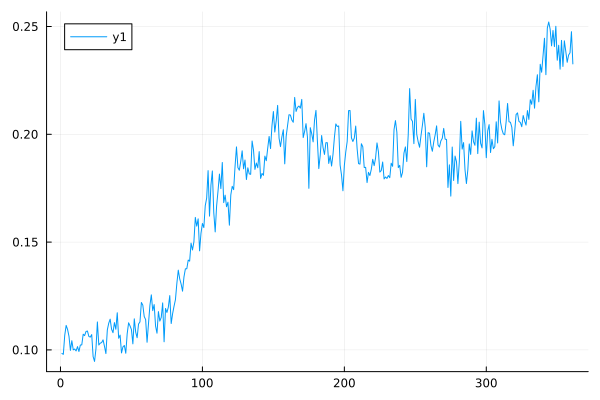

In [156]:
# Import iamge stack
img_path = "../CroppedMovies/test.tif"
img = load(img_path)
# Use stack sum to find polarity patch(es)
avgimg = mean(img, dims=(3))[:,:,1]
bin = avgimg .> maximum(avgimg)/2             # Half max of average is used as threshold
bin_lab = label_components(bin)             # Label connected components in binary mask
max_loc = findlocalmaxima(mask)             # Find single connected component from binary with highest value
max_lab = bin_lab[max_loc]                  
max_bin = bin_lab .== max_lab               # Make mask only around correct component
masked = avgimg .* max_bin                   # Make masked time averaged image (not used)
# Use masked image to plot sum intensity over time
im_all = Float64.(img)
im_masked = im_all .* max_bin
plot(sum(immask, dims=(1,2))[1,1,:])

In [152]:
bin[20,20] = 1
binlab = label_components(bin)
heatmap(binlab)
max_loc = findlocalmaxima(mask)
max_lab = binlab[max_loc]
max_bin = binlab .== max_lab
mask = sim .* max_bin

61×56 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱       ⋮                        ⋮
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    

In [4]:
img_path = "../CroppedMovies/test.tif"
img = load(img_path)

Loading: 100%|███████████████████████████████████████████| Time: 0:00:01


61×56×361 Array{Gray{N0f16},3} with eltype Gray{N0f16}:
[:, :, 1] =
 Gray{N0f16}(0.00362)  Gray{N0f16}(0.00343)  …  Gray{N0f16}(0.00209)
 Gray{N0f16}(0.0033)   Gray{N0f16}(0.00343)     Gray{N0f16}(0.00168)
 Gray{N0f16}(0.00354)  Gray{N0f16}(0.00443)     Gray{N0f16}(0.00194)
 Gray{N0f16}(0.00375)  Gray{N0f16}(0.00365)     Gray{N0f16}(0.00172)
 Gray{N0f16}(0.00371)  Gray{N0f16}(0.00381)     Gray{N0f16}(0.00177)
 Gray{N0f16}(0.00308)  Gray{N0f16}(0.00392)  …  Gray{N0f16}(0.00174)
 Gray{N0f16}(0.00356)  Gray{N0f16}(0.00401)     Gray{N0f16}(0.00159)
 Gray{N0f16}(0.00381)  Gray{N0f16}(0.00401)     Gray{N0f16}(0.00151)
 Gray{N0f16}(0.00381)  Gray{N0f16}(0.00366)     Gray{N0f16}(0.00142)
 Gray{N0f16}(0.0036)   Gray{N0f16}(0.00302)     Gray{N0f16}(0.00162)
 ⋮                                           ⋱  ⋮
 Gray{N0f16}(0.002)    Gray{N0f16}(0.00177)     Gray{N0f16}(0.00154)
 Gray{N0f16}(0.00171)  Gray{N0f16}(0.00169)     Gray{N0f16}(0.00151)
 Gray{N0f16}(0.00179)  Gray{N0f16}(0.00159)     Gray{N

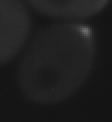

In [86]:
im1 = img[:,:,100]
avgimg = mean(img, dims=(3))[:,:,1]
avgimg*50

In [87]:
sim = Float64.(avgimg)
median(sim)
quantile(vec(sim), .99)

0.004029981653245271

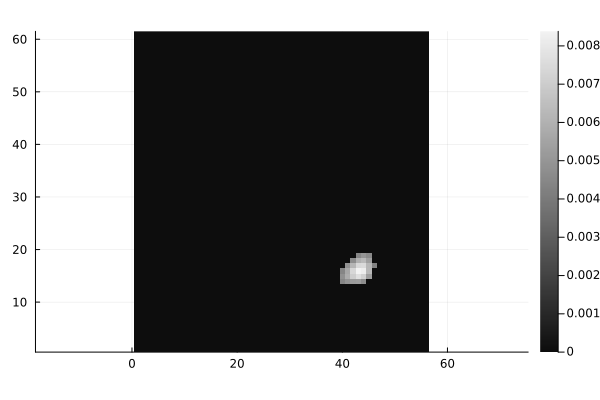

In [96]:
bin = sim .> maximum(sim)/2
smask = sim .* bin
heatmap(smask, color=:grays, aspect_ratio=1)

In [97]:
im1 = Float64.(img[:,:,100])
im1

61×56 Matrix{Float64}:
 0.00433356  0.00357061  0.00271611  …  0.00247196  0.0021973   0.00196841
 0.0034638   0.00361639  0.00300603     0.00241093  0.00181582  0.00175479
 0.00399786  0.00411994  0.00419623     0.0019379   0.0015259   0.00195315
 0.00402838  0.00367742  0.00370794     0.00198367  0.0018616   0.00161746
 0.00424201  0.0034638   0.00325017     0.00180056  0.00175479  0.00175479
 0.00303655  0.00344854  0.00318914  …  0.00178531  0.00166323  0.00158694
 0.00392157  0.00344854  0.00320439     0.00157168  0.00170901  0.00155642
 0.00396735  0.00389105  0.00296025     0.00177005  0.00164797  0.00173953
 0.00292973  0.00381476  0.00341802     0.00161746  0.00161746  0.00161746
 0.00303655  0.00251774  0.00433356     0.0015259   0.00184634  0.00154116
 ⋮                                   ⋱                          ⋮
 0.00154116  0.00167849  0.00170901     0.00180056  0.0018616   0.00144961
 0.00155642  0.0016022   0.00172427     0.00157168  0.0015259   0.00167849
 0.00173953

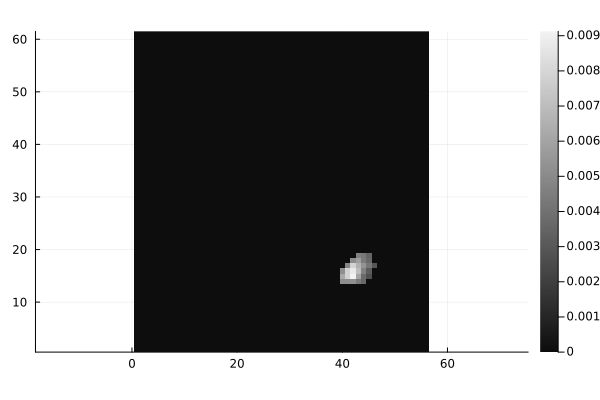

In [98]:
im1 = Float64.(img[:,:,100])
immask = im1 .* bin
heatmap(immask, color=:grays, aspect_ratio=1)

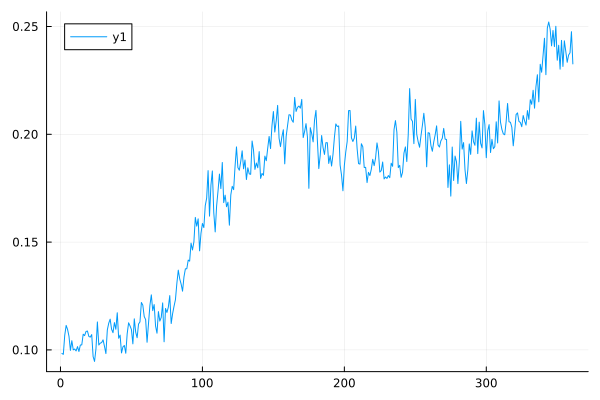

In [133]:
im_all = Float64.(img)
immask = im_all .* bin
plot(sum(immask, dims=(1,2))[1,1,:])

In [56]:
locs = findlocalmaxima(sumimg, edges=true)
length(locs)

176

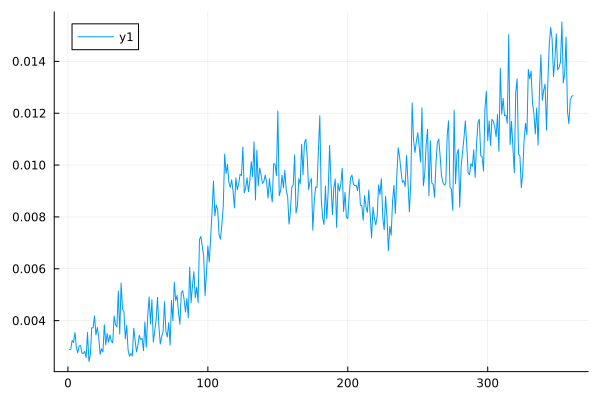

In [126]:
maximg = maximum(Float64.(img), dims=(1,2))[1,1,:] .- median(Float64.(img))
maximg
plot(maximg)

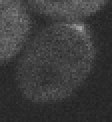

In [127]:
img[:,:,40]*100

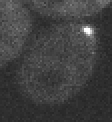

In [128]:
img[:,:,300]*100